<a href="https://colab.research.google.com/github/vsan46/simulation_english_auction/blob/main/Simulation_English_Auction_(Ascending_Bid).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- 0. Import Libraries ---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# --- 1. Simulation Parameters ---
NUM_SIMULATIONS = 10000
NUM_BIDDERS = 5
MIN_VALUE = 50  # Bidders' private values are drawn from a uniform distribution
MAX_VALUE = 100 # between MIN_VALUE and MAX_VALUE

def run_english_auction():
    """
    Simulates a single round of an English Auction.

    In a standard English auction, rational bidders will bid up to their
    private value. The bidding stops when the second-to-last bidder drops out.

    - The winner is the bidder with the HIGHEST private value.
    - The price they pay is (approximately) the SECOND-HIGHEST private value.
    """

    # Generate private values for all bidders from a uniform distribution
    private_values = np.random.uniform(MIN_VALUE, MAX_VALUE, NUM_BIDDERS)

    # Sort values to easily find the highest and second-highest
    sorted_values = np.sort(private_values)[::-1] # Sort descending

    highest_value = sorted_values[0]
    second_highest_value = sorted_values[1]

    # --- Determine Metrics ---

    # Revenue for the seller is the final price paid
    revenue = second_highest_value

    # Efficiency: Did the item go to the person who valued it most?
    # In this model, the highest-value bidder always wins.
    efficiency = 1.0 # 1.0 (True)

    # Winner's Surplus: The "deal" the winner got.
    # (What they were willing to pay) - (What they actually paid)
    winner_surplus = highest_value - second_highest_value

    return revenue, efficiency, winner_surplus

In [ ]:
# --- 2. Run the Monte Carlo Simulation ---
results = []
for _ in range(NUM_SIMULATIONS):
    results.append(run_english_auction())

# Convert results to a pandas DataFrame for easy analysis
df = pd.DataFrame(results, columns=['revenue', 'efficiency', 'winner_surplus'])

In [ ]:
# --- 3. Calculate and Print Aggregate Metrics ---
avg_revenue = df['revenue'].mean()
avg_efficiency = df['efficiency'].mean()
avg_winner_surplus = df['winner_surplus'].mean()

print("--- English Auction Simulation Results ---")
print(f"Number of Simulations: {NUM_SIMULATIONS}")
print(f"Number of Bidders: {NUM_BIDDERS}")
print(f"Value Distribution: Uniform(${MIN_VALUE}, ${MAX_VALUE})")
print("-" * 40)
print(f"Average Seller Revenue: ${avg_revenue:.2f}")
print(f"Average Winner's Surplus: ${avg_winner_surplus:.2f}")
print(f"Auction Efficiency: {avg_efficiency * 100:.1f}%")
print("-" * 40)

--- English Auction Simulation Results ---
Number of Simulations: 10000
Number of Bidders: 5
Value Distribution: Uniform($50, $100)
----------------------------------------
Average Seller Revenue: $83.44
Average Winner's Surplus: $8.27
Auction Efficiency: 100.0%
----------------------------------------


Saved revenue histogram to 'english_auction_revenue.png'
Saved surplus histogram to 'english_auction_surplus.png'


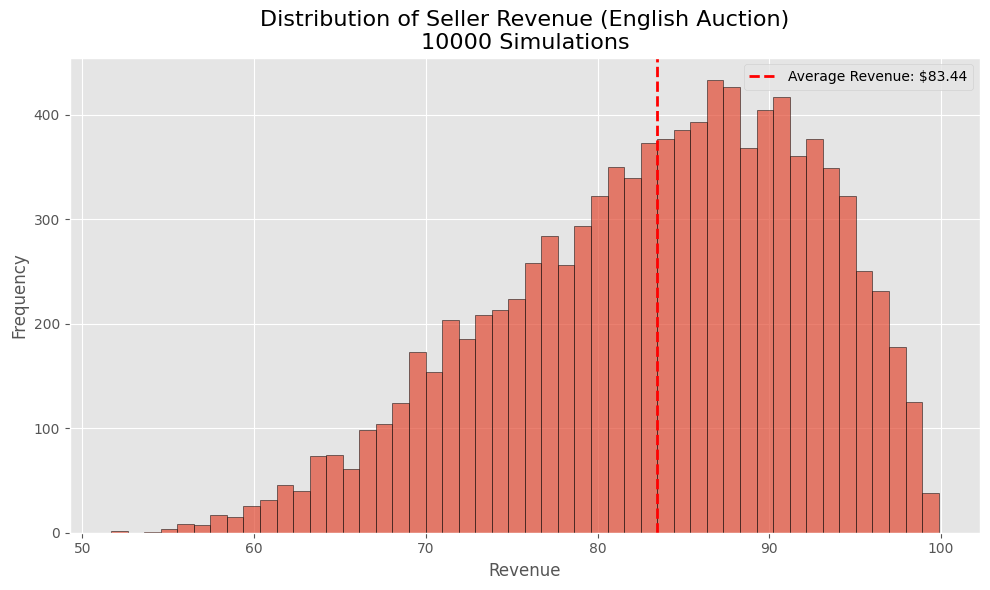

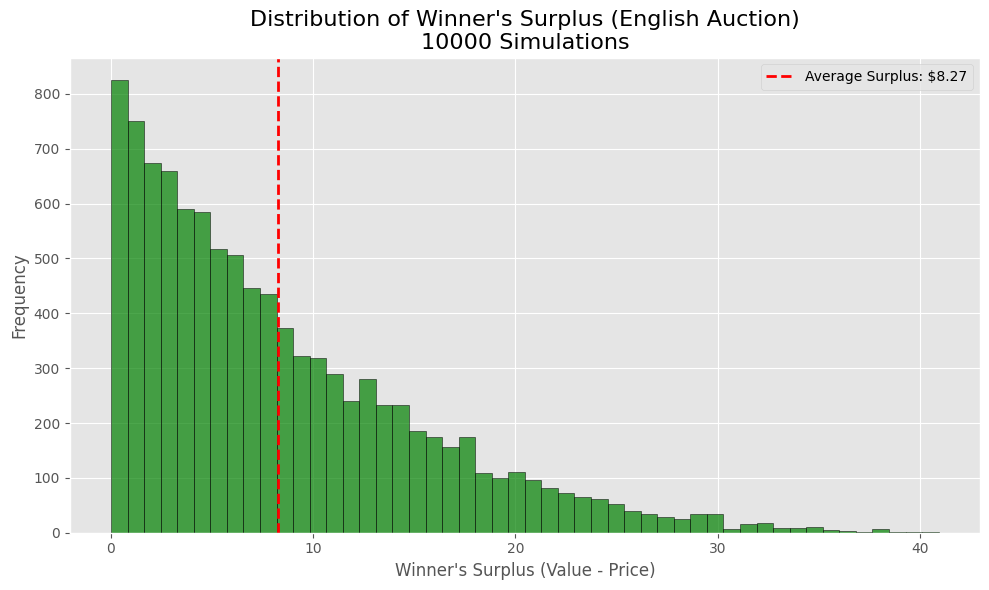

In [ ]:
# --- 4. Generate and Save Graphs ---

# Set a consistent style
plt.style.use('ggplot')

# Plot 1: Distribution of Seller Revenue
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=50, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Seller Revenue (English Auction)\n{NUM_SIMULATIONS} Simulations', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(avg_revenue, color='red', linestyle='--', linewidth=2, label=f'Average Revenue: ${avg_revenue:.2f}')
plt.legend()
plt.tight_layout()
# plt.savefig('english_auction_revenue.png')
print("Saved revenue histogram to 'english_auction_revenue.png'")

# Clear the plot for the next one
# plt.clf()

# Plot 2: Distribution of Winner's Surplus
plt.figure(figsize=(10, 6))
plt.hist(df['winner_surplus'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title(f"Distribution of Winner's Surplus (English Auction)\n{NUM_SIMULATIONS} Simulations", fontsize=16)
plt.xlabel("Winner's Surplus (Value - Price)", fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(avg_winner_surplus, color='red', linestyle='--', linewidth=2, label=f'Average Surplus: ${avg_winner_surplus:.2f}')
plt.legend()
plt.tight_layout()
# plt.savefig('english_auction_surplus.png')
print("Saved surplus histogram to 'english_auction_surplus.png'")